imports

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import random
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.layers import LSTM, Dropout
import datetime
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

/var/folders/c4/d406q2cs0jx8y9m35w0pn47w0000gn/T/ipykernel_4132/68976172.py:20: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


['/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/SFNSRounded.ttf',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/Thonburi.ttc',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/Supplemental/SignPainter.ttc',
 '/System/Library/Fonts/Supplemental/PTSans.ttc',
 '/System/Library/Fonts/Supplemental/Mshtakan.ttc',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/PingFang.ttc',
 '/System/Library/Fonts/Supplemental/SuperClarendon.ttc',
 '/System/Library/Fonts/GeezaPro.ttc',
 '/System/Library/Fonts/NotoSansKannada.ttc',
 '/System/Library/Fonts/NotoSansMyanmar.ttc',
 '/System/Library/Fonts/NotoSansArmenian.ttc',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/SFNS.ttf',
 '/System/Library/Fonts/SFCompact.ttf',
 '/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc',
 '/Syst

재료 만들기

In [2]:
daefa = pd.read_csv('대파Model.csv')
daefa.head()

,날짜,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,...,자동차용경유,소비자물가지수,농축수산물,공업제품,집세,공공서비스,개인서비스,근원물가,생활물가,대파가격
0,2014-01-03,0.0,0.0,2.6,10.1,-3.2,54,12,1.2,9.6,...,1707.15,1.1,-5.6,1.7,2.4,0.7,1.2,1.7,0.6,857.382976
1,2014-01-04,1.2,31.0,1.5,6.9,-2.8,63,12,1.7,11.9,...,1707.61,1.1,-5.6,1.7,2.4,0.7,1.2,1.7,0.6,891.743009
2,2014-01-06,0.0,11.0,0.2,7.6,-5.1,59,12,1.1,7.7,...,1707.80,1.1,-5.6,1.7,2.4,0.7,1.2,1.7,0.6,948.409142
3,2014-01-07,0.0,1.5,1.9,7.8,-4.3,60,16,1.1,8.0,...,1707.73,1.1,-5.6,1.7,2.4,0.7,1.2,1.7,0.6,932.950637
4,2014-01-08,1.8,41.3,2.1,5.3,-1.4,65,25,2.4,17.7,...,1707.70,1.1,-5.6,1.7,2.4,0.7,1.2,1.7,0.6,987.608584


In [3]:
A_1 = [];A_2 = [];A_3 = [];A_4 = [];A_5 = [];A_6 = [];A_7 = [];A_8 = [];A_9 = [];A_10 = []
paypay = [100, 200, 300, 400, 500]
for x in range(100):
    A_1.append(random.choice(paypay))
    A_2.append(random.randint(0, 11))
    A_5.append(random.randint(5, 16))
    A_8.append(random.randint(20, 31))
    A_3.append(random.randint(0, 5))
    A_6.append(random.randint(0, 7))
    A_9.append(random.randint(0, 9))
    A_4.append(random.randint(20, 40))
    A_7.append(random.randint(30, 80))
    A_10.append(random.randint(50, 90))

In [4]:
studydf = pd.DataFrame({'가격':A_1,
                        '기온1':A_2,
                        '강우량1':A_3,
                        '습도1':A_4,
                        '기온2':A_5,
                        '강우량2':A_6,
                        '습도2':A_7,
                        '기온3':A_8,
                        '강우량3':A_9,
                        '습도3':A_10})
studydf

,가격,기온1,강우량1,습도1,기온2,강우량2,습도2,기온3,강우량3,습도3
0,200,8,2,35,7,7,41,29,7,64
1,500,3,2,30,7,7,33,20,1,67
2,200,4,5,36,12,5,54,28,4,54
3,200,0,5,40,6,1,69,25,7,73
4,500,7,2,28,10,7,36,27,3,72
...,...,...,...,...,...,...,...,...,...,...
95,500,9,4,38,14,0,50,21,9,66
96,500,6,5,30,13,5,80,22,0,83
97,100,1,2,37,16,2,74,22,0,74
98,200,10,4,29,12,7,36,31,1,74


# pandas Dataframe 다루기

In [10]:
# 어떤 농작물이 있어서 1지역에서 56%, 2지역에서 33%, 3지역에서 11% 재배된다고 할 때, 적절한 평균 기온/강우량/적설량... 산출하기
studydf2 = studydf.copy()
studydf2['기온의_적절한_평균'] = studydf['기온1'] * (56 / 100) + studydf['기온2'] * (33 / 100) + studydf['기온3'] * (11 / 100)
studydf2['강우량의_적절한_평균'] = studydf['강우량1'] * (56 / 100) + studydf['강우량2'] * (33 / 100) + studydf['강우량3'] * (11 / 100)
studydf2['습도의_적절한_평균'] = studydf['습도1'] * (56 / 100) + studydf['습도2'] * (33 / 100) + studydf['습도3'] * (11 / 100)
studydf2 = studydf2.drop(['기온1', '강우량1', '습도1', '기온2', '강우량2', '습도2', '기온3', '강우량3', '습도3'], axis=1)
studydf2

,가격,기온의_적절한_평균,강우량의_적절한_평균,습도의_적절한_평균
0,200,9.98,4.20,40.17
1,500,6.19,3.54,35.06
2,200,9.28,4.89,43.92
3,200,4.73,3.90,53.20
4,500,10.19,3.76,35.48
...,...,...,...,...
95,500,11.97,3.23,45.04
96,500,10.07,4.45,52.33
97,100,8.26,1.78,53.28
98,200,12.97,4.66,36.26


# Random Forest랑 LightGBM

In [6]:
feature = []
for i in daefa.columns:
    feature.append(i)
feature.remove('날짜')
feature.remove('대파가격')
print(feature)

['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속', '최대풍속', '대파거래량', '대파생산량', '대파저장이월량', '대파수입량', '대파수입금액', '대파재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세', '공공서비스', '개인서비스', '근원물가', '생활물가']


Random Forest

/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N

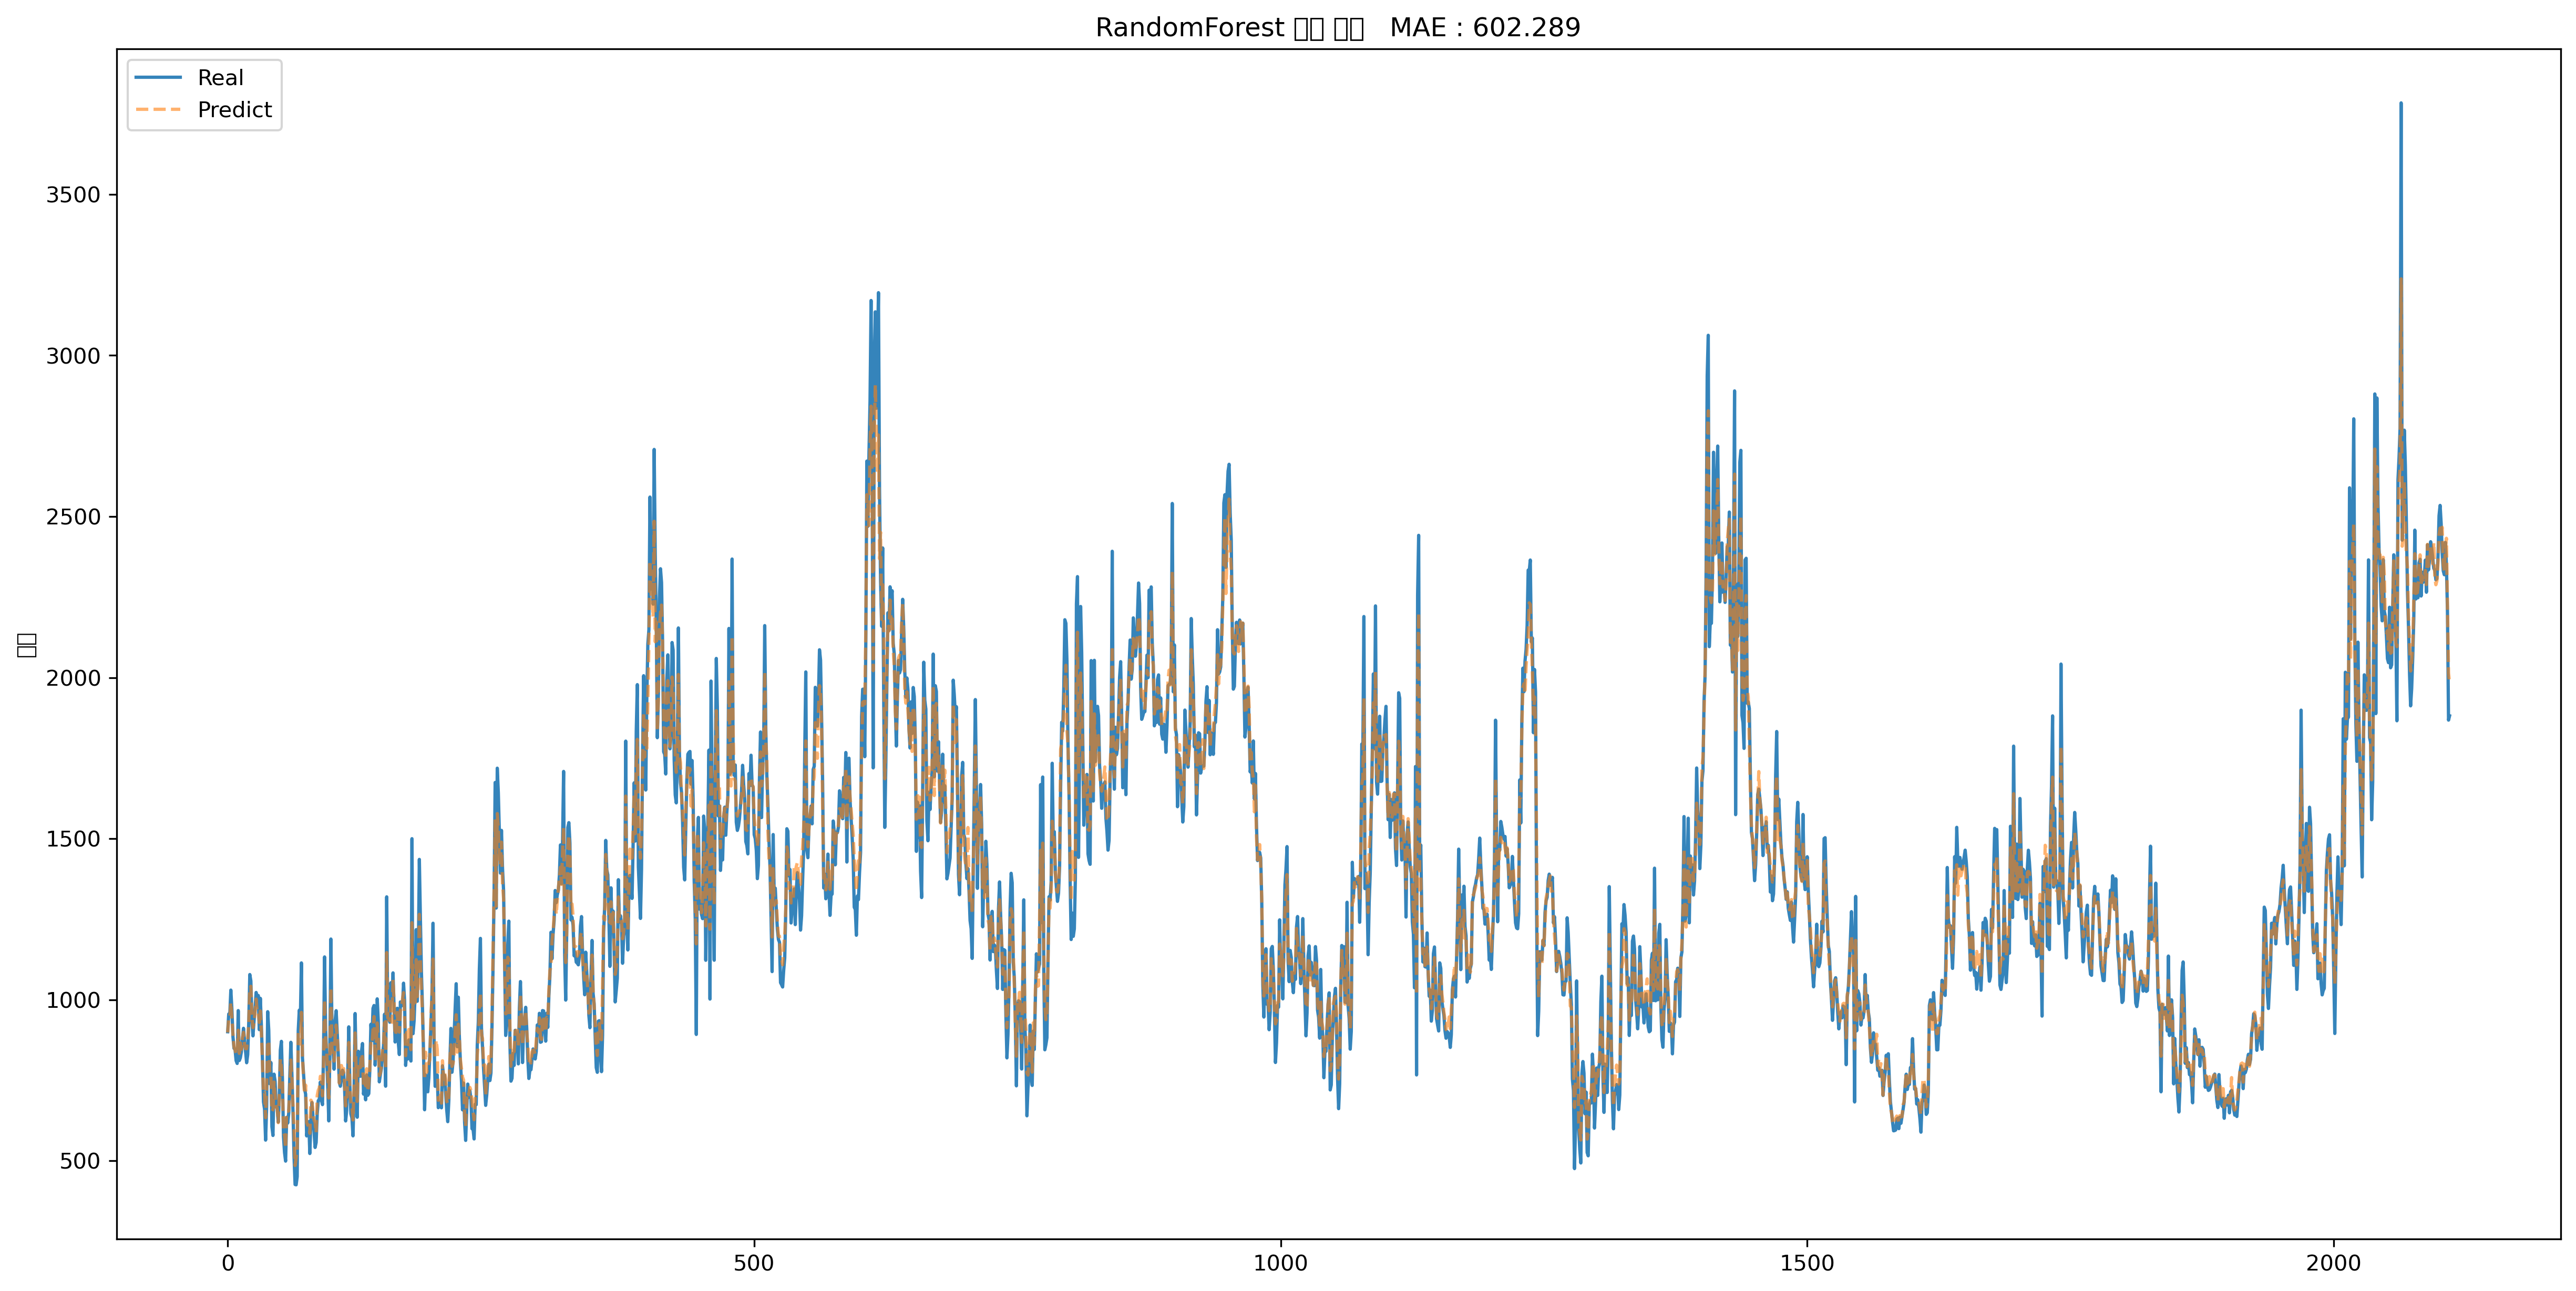

In [7]:
daefa['target'] = daefa['대파가격'].shift(-29)
df_learn = daefa[:-58]
df_predict = daefa[-58:]
train_X = df_learn[feature]
train_y = df_learn['target']
test_X = df_predict[:29][feature]
test_y = df_predict[:29]['target']

model = RandomForestRegressor()
model.fit(train_X, train_y)

y_pred = model.predict(test_X)
MAE = mean_absolute_error(test_y, y_pred)

plt.figure(figsize=(20, 10), dpi=300)
plt.title('RandomForest 예측 결과'+   '   MAE : ' + str(MAE)[:7])
plt.ylabel('가격')
plt.plot(np.array(train_y), alpha = 0.9, label = 'Real')
plt.plot(model.predict(train_X), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()

LightGBM

In [8]:
daefa['target'] = daefa['대파가격'].shift(-8)

df_learn = daefa[:-16]
df_predict = daefa[-16:]
train_X = df_learn[feature].values.reshape(-1,1,len(feature))
train_y = df_learn['target'].values.reshape(-1,1,1)
test_X = df_predict[:8][feature].values.reshape(-1,1,len(feature))
test_y = df_predict[:8]['target'].values.reshape(-1,1,1)

model = Sequential()
model.add(layers.Activation('relu'))
model.add(tf.compat.v1.keras.layers.LSTM(100, input_shape=(21,len(feature)), return_sequences=True))
model.add(Dropout(0.1))
model.add(layers.Dense(30))
model.add(Dropout(0.1))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=30)
model.fit(train_X, train_y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/1000


2022-09-27 09:37:42.244702: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


61/61 [==============================] - 1s 3ms/step - loss: 1877461.7500 - val_loss: 3245138.7500
Epoch 2/1000
61/61 [==============================] - 0s 1ms/step - loss: 1839034.3750 - val_loss: 3176505.5000
Epoch 3/1000
61/61 [==============================] - 0s 1ms/step - loss: 1774219.0000 - val_loss: 3070870.2500
Epoch 4/1000
61/61 [==============================] - 0s 1ms/step - loss: 1681366.7500 - val_loss: 2928663.7500
Epoch 5/1000
61/61 [==============================] - 0s 1ms/step - loss: 1565363.6250 - val_loss: 2756521.5000
Epoch 6/1000
61/61 [==============================] - 0s 2ms/step - loss: 1429555.3750 - val_loss: 2560611.7500
Epoch 7/1000
61/61 [==============================] - 0s 1ms/step - loss: 1283518.6250 - val_loss: 2349560.2500
Epoch 8/1000
61/61 [==============================] - 0s 1ms/step - loss: 1131305.5000 - val_loss: 2128685.2500
Epoch 9/1000
61/61 [==============================] - 0s 1ms/step - loss: 981694.3125 - val_loss: 1909300.5000
Epoch 

Epoch 75/1000
61/61 [==============================] - 0s 1ms/step - loss: 226298.3438 - val_loss: 519395.7812
Epoch 76/1000
61/61 [==============================] - 0s 1ms/step - loss: 225426.3594 - val_loss: 517250.5625
Epoch 77/1000
61/61 [==============================] - 0s 1ms/step - loss: 225299.3750 - val_loss: 512496.7500
Epoch 78/1000
61/61 [==============================] - 0s 1ms/step - loss: 222378.9688 - val_loss: 512279.5625
Epoch 79/1000
61/61 [==============================] - 0s 1ms/step - loss: 227510.6094 - val_loss: 514610.8750
Epoch 80/1000
61/61 [==============================] - 0s 1ms/step - loss: 224999.5625 - val_loss: 512872.9688
Epoch 81/1000
61/61 [==============================] - 0s 1ms/step - loss: 226035.9062 - val_loss: 516410.8125
Epoch 82/1000
61/61 [==============================] - 0s 1ms/step - loss: 228919.5469 - val_loss: 516976.9375
Epoch 83/1000
61/61 [==============================] - 0s 1ms/step - loss: 226020.1094 - val_loss: 518759.2812
E

/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N

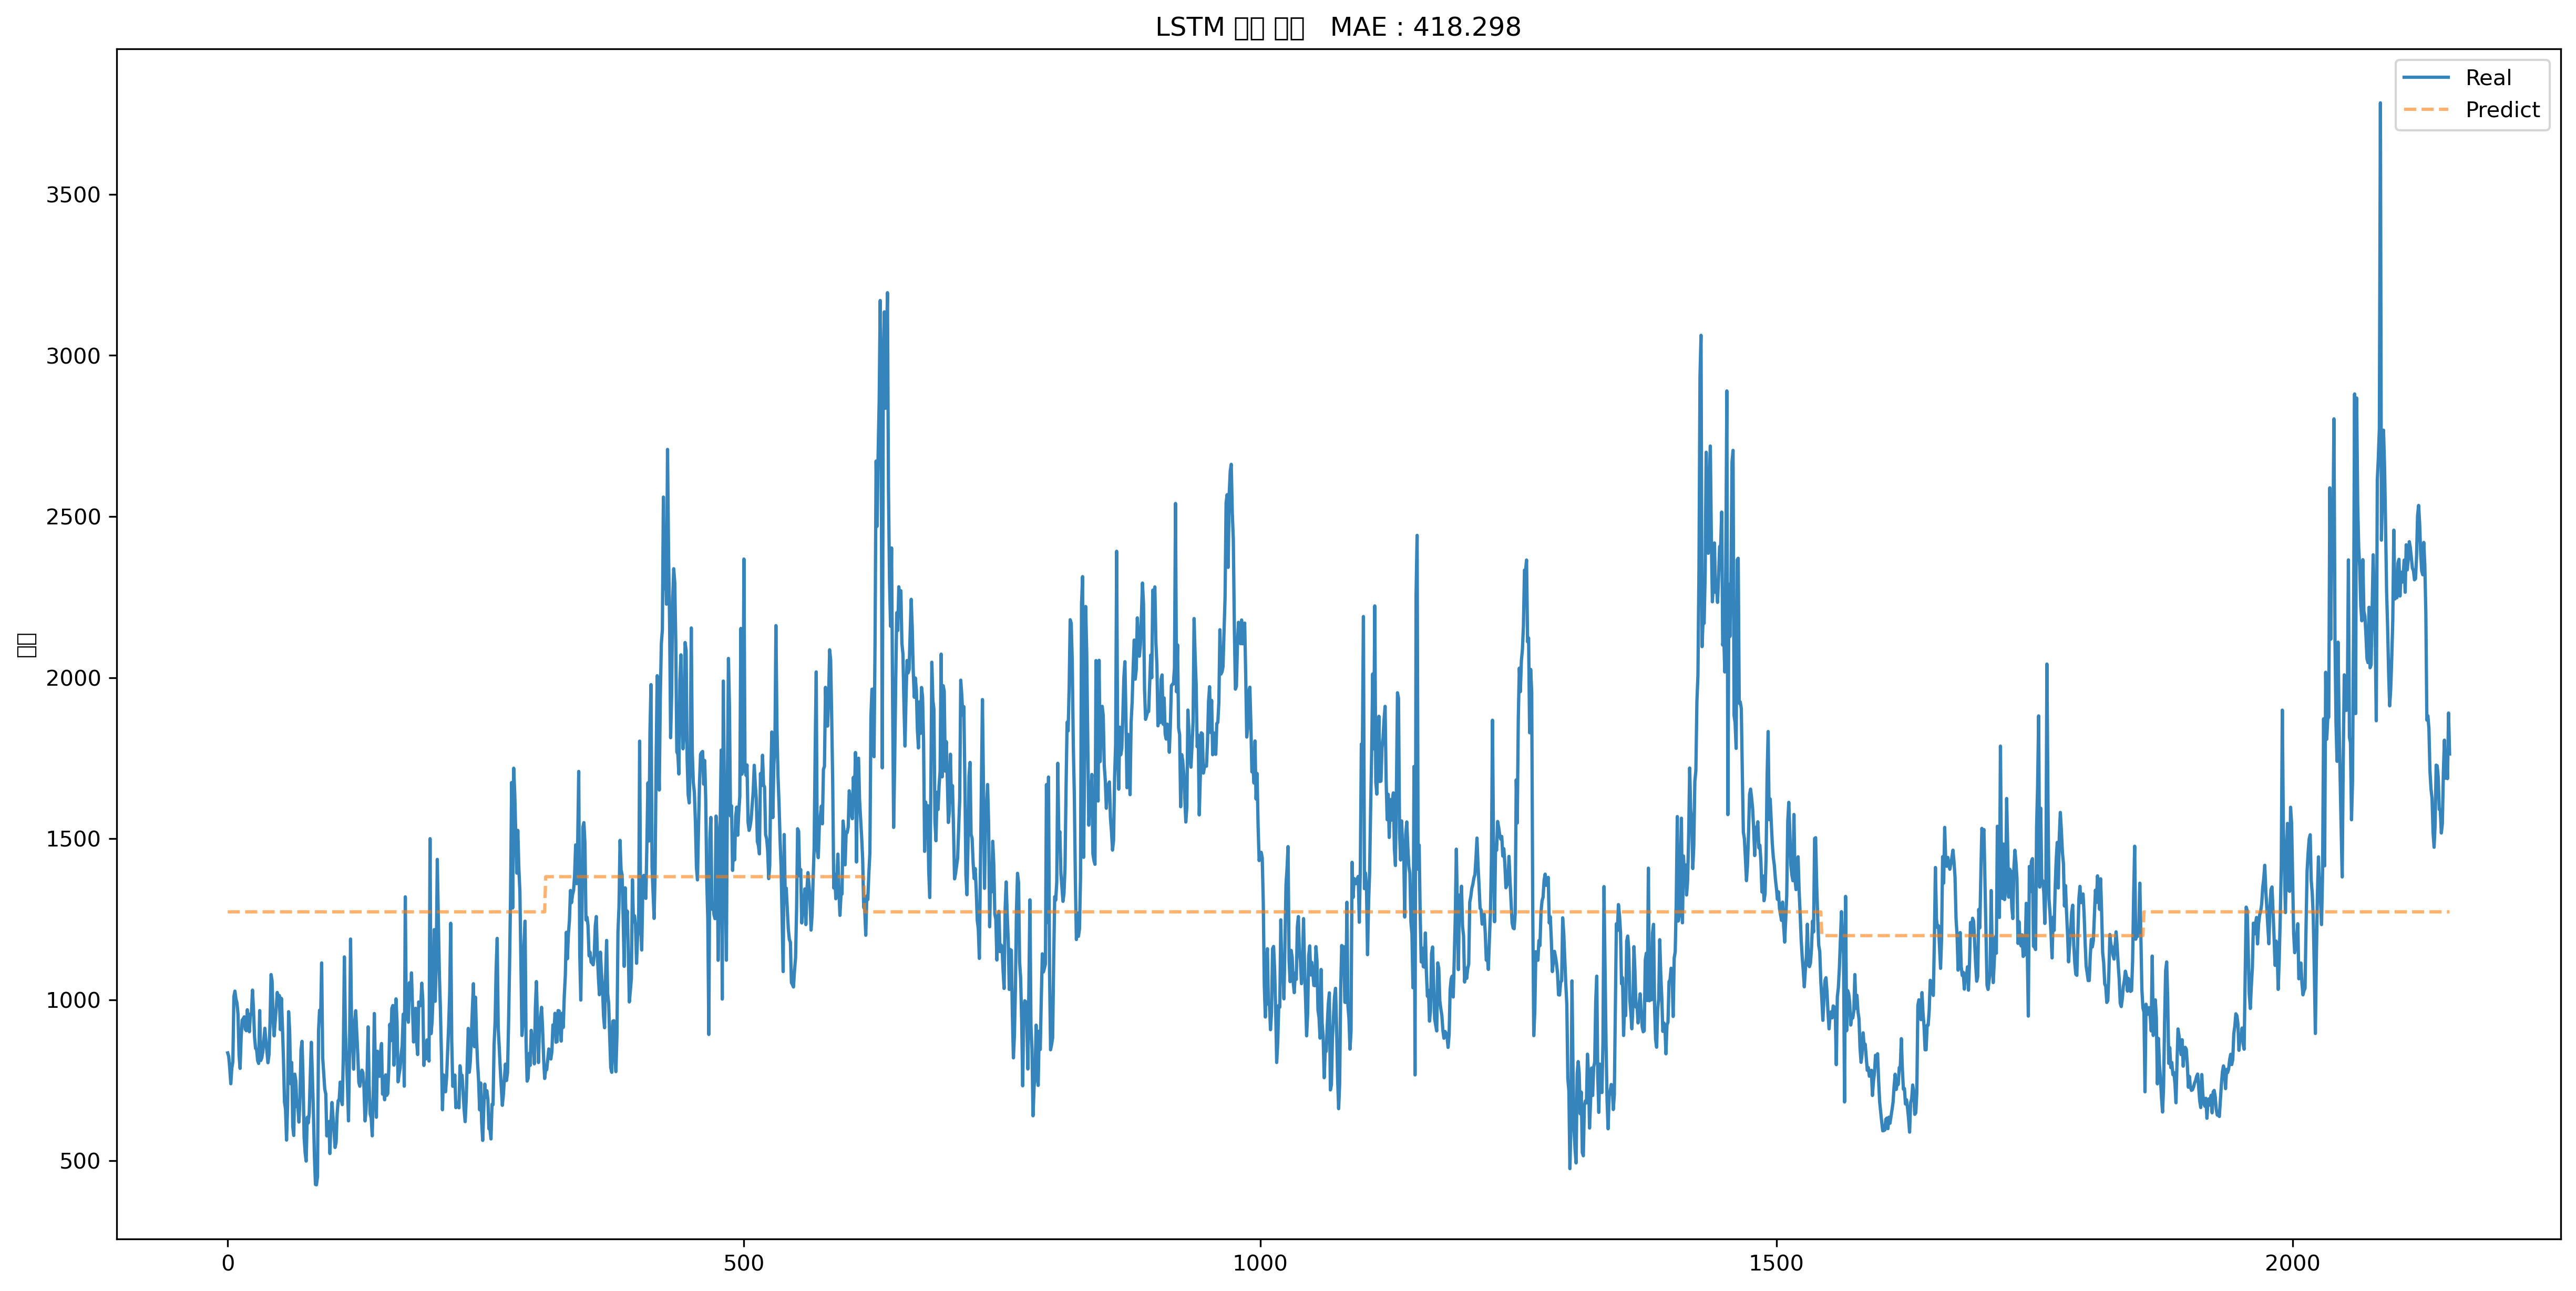

In [9]:
y_pred = model.predict(test_X)
MAE = mean_absolute_error(test_y.reshape(-1,1), y_pred.reshape(-1,1))

plt.figure(figsize=(20, 10), dpi=300)
plt.title('LSTM 예측 결과'+   '   MAE : ' + str(MAE)[:7])
plt.ylabel('가격')
plt.plot(np.array(train_y.reshape(-1,1)), alpha = 0.9, label = 'Real')
plt.plot(model.predict(train_X).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
plt.legend()
plt.show()